# Dibetes  Prediction





# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd

# Data Collection and Analysis



In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv("C:\\Users\\Hp\\Downloads\\diabetes.csv")

In [60]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

# Checking Null values

In [62]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Checking Duplicate values

In [63]:
diabetes_dataset.duplicated().sum()

0

In [64]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
import seaborn as sns

C:\Users\Hp\AppData\Local\Temp\ipykernel_15316\2632577129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

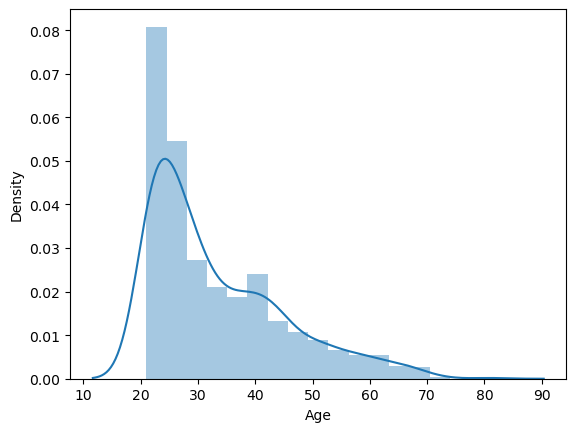

In [67]:
sns.distplot(diabetes_dataset['Age'])

In [68]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [69]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [70]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [71]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [72]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X)

StandardScaler()

In [76]:
standardized_data = scaler.transform(X)

In [77]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [78]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [79]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

## Support Vector Machine(SVM)

In [83]:
from sklearn import svm

In [84]:
classifier = svm.SVC(kernel='linear')

In [85]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [88]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [89]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [90]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


## Decision Tree  Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt=DecisionTreeClassifier(criterion = "entropy", 
                                        splitter = "random", 
                                        max_depth = 10,
                                        min_samples_split = 3,
                                        min_samples_leaf = 6, 
                                        max_features = 5,
                                       random_state=200) 

In [93]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=5,
                       min_samples_leaf=6, min_samples_split=3,
                       random_state=200, splitter='random')

In [94]:
y_pred1 = dt.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(Y_test , y_pred1)

0.6818181818181818

In [97]:
# Training Accuracy
dt.score(X_train,Y_train)

0.8013029315960912

In [98]:
# testing Accuracay
dt.score(X_test,Y_test) 

0.6818181818181818

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       100
           1       0.56      0.41      0.47        54

    accuracy                           0.68       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.67      0.68      0.67       154



## Gradient Boosting Classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
gbc=GradientBoostingClassifier()

In [103]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [104]:
y_pred3 = gbc.predict(X_test)

In [105]:
accuracy_score(Y_test , y_pred3)

0.7012987012987013

In [106]:
# Training Accuracy
gbc.score(X_train,Y_train)

0.9250814332247557

In [107]:
# testing Accuracay
gbc.score(X_test,Y_test) 

0.7012987012987013

In [108]:
print(classification_report(Y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.60      0.44      0.51        54

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.69      0.70      0.69       154



# Final 

In [109]:
final_data=pd.DataFrame({'Models':['SVM','DT','GB'],
                        'ACC':[test_data_accuracy,
                              accuracy_score(Y_test , y_pred1),
                              accuracy_score(Y_test , y_pred3)]})
                            
                            
                              

In [110]:
final_data

,Models,ACC
0,SVM,0.772727
1,DT,0.681818
2,GB,0.701299


In [111]:
import matplotlib.pyplot as plt

In [112]:
import seaborn as sns

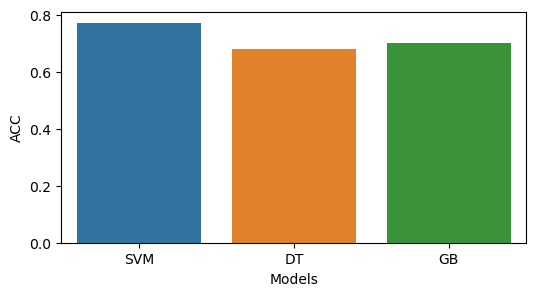

In [113]:
plt.figure(figsize=(6,3))
sns.barplot(x='Models',y='ACC',data = final_data)
plt.show()